## Loading necessary packages

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, Normalizer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

### Loading dataset

In [15]:
from sklearn.datasets import load_svmlight_file
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
data_file = 'Diabetes dataset.txt'

# Load the data
X, y = load_svmlight_file(data_file)

# Convert the sparse matrix to a dense matrix (optional)
X = X.toarray()

# Display the loaded data
print("Features (X):", X)
print("Labels (y):", y)


Features (X): [[  6.       148.        72.       ...  33.599998   0.627     50.      ]
 [  1.        85.        66.       ...  26.6        0.351     31.      ]
 [  8.       183.        64.       ...  23.299999   0.672     32.      ]
 ...
 [  5.       121.        72.       ...  26.200001   0.245     30.      ]
 [  1.       126.        60.       ...  30.1        0.349     47.      ]
 [  1.        93.        70.       ...  30.4        0.315     23.      ]]
Labels (y): [-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1. -1. -1. -1

In [47]:
import pandas as pd
df=pd.DataFrame(X, columns=['preg','glucose','bp','st','insulin','bmi','dp','age'])
df['label']=y # 1-> no-diabetes, -1 -> diabetes
df['label_name']=df['label'].map({-1:'Diabetes', 1:'No diabetes'})
df

,preg,glucose,bp,st,insulin,bmi,dp,age,label,label_name
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0,-1.0,Diabetes
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,1.0,No diabetes
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0,-1.0,Diabetes
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,1.0,No diabetes
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0,-1.0,Diabetes
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.900002,0.171,63.0,1.0,No diabetes
764,2.0,122.0,70.0,27.0,0.0,36.799999,0.340,27.0,1.0,No diabetes
765,5.0,121.0,72.0,23.0,112.0,26.200001,0.245,30.0,1.0,No diabetes
766,1.0,126.0,60.0,0.0,0.0,30.100000,0.349,47.0,-1.0,Diabetes


### Vizualizing each column using box plot

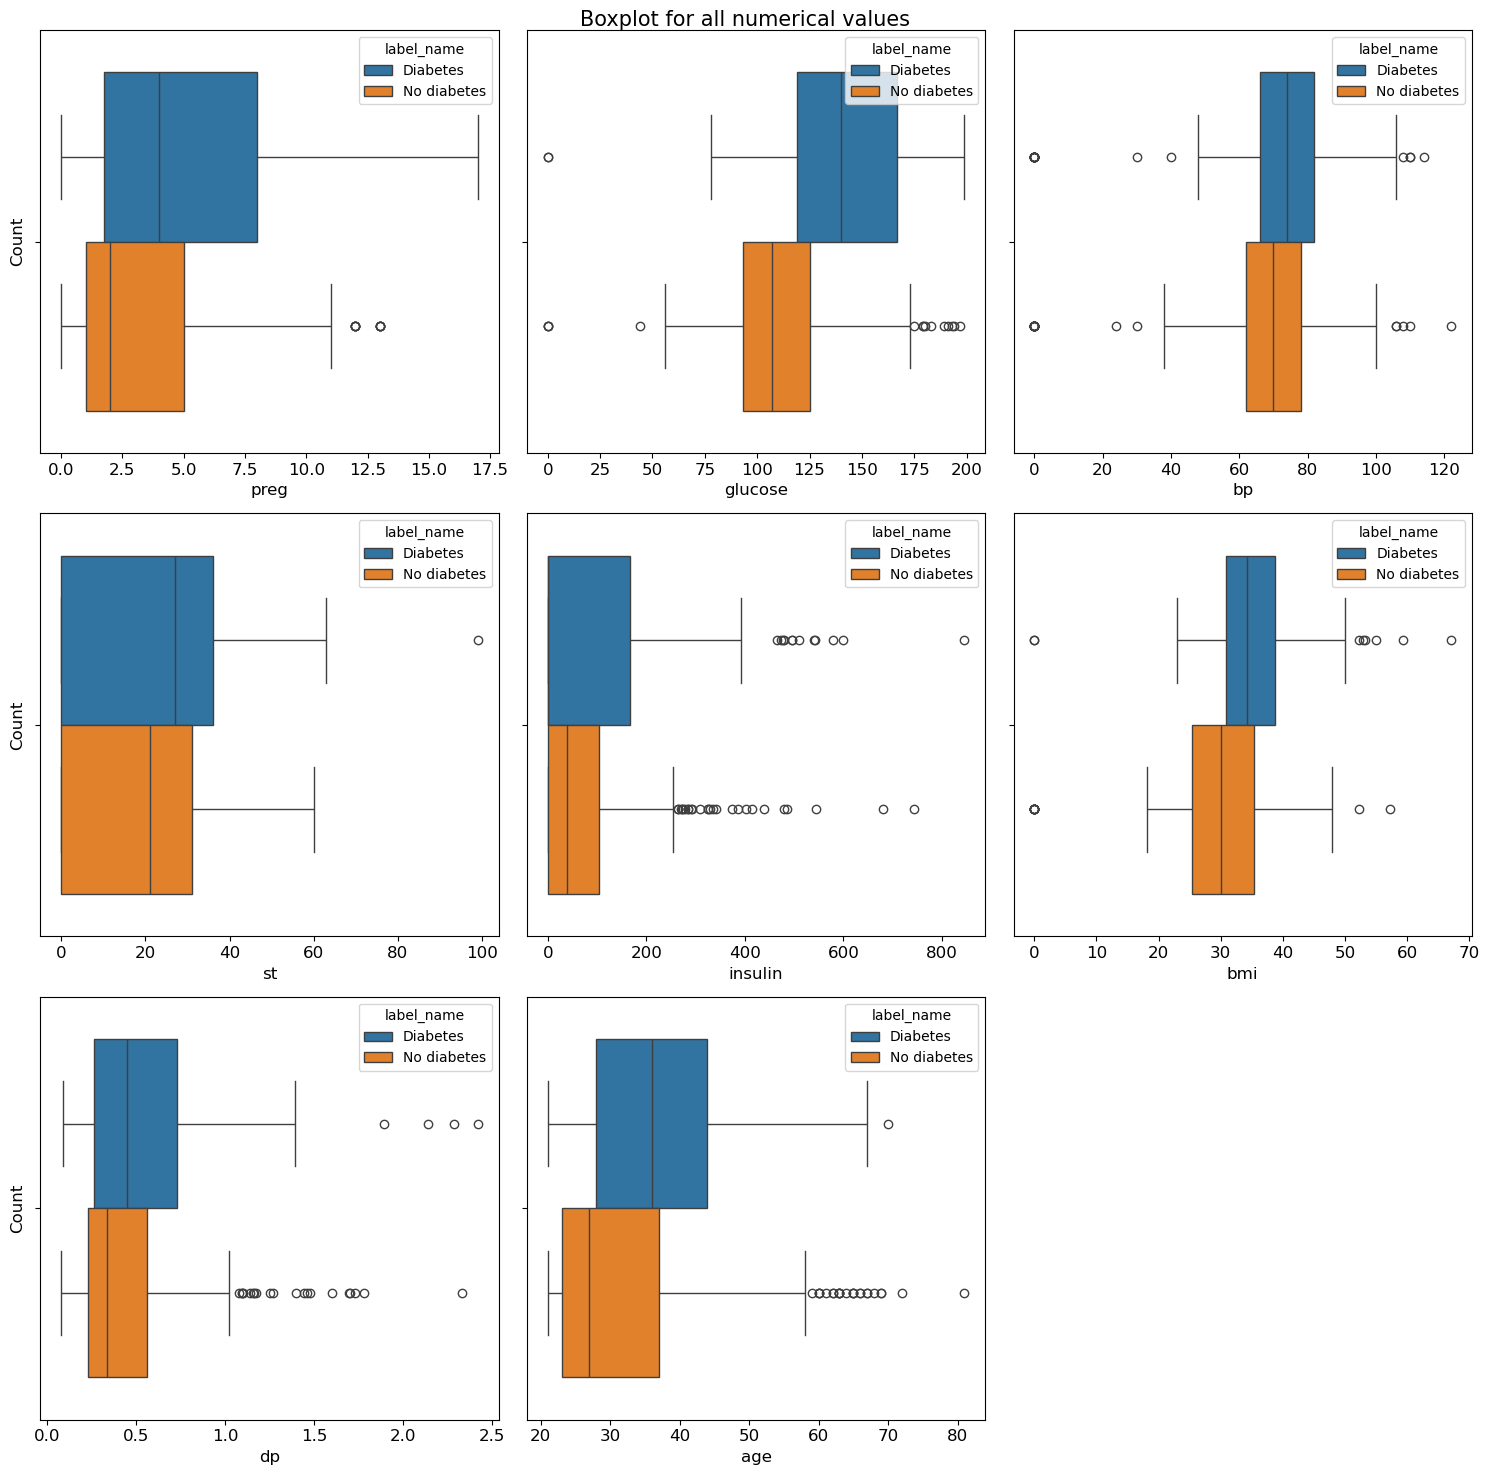

In [49]:
fig, axs= plt.subplots(3,3, figsize=(15, 15))
for_boxplot=df.columns[:-2]

for i in range(3):
    for j in range(3):
        index = i * 3 + j
        if index < len(for_boxplot):
            sns.boxplot(df, x=for_boxplot[index], ax=axs[i,j], hue="label_name", palette=sns.color_palette("tab10",2))
            axs[i,j].set_xlabel(for_boxplot[index], fontsize=12)
            if j==0:
                axs[i,j].set_ylabel('Count', fontsize=12)
        else:
            fig.delaxes(axs[i, j])


fig.suptitle('Boxplot for all numerical values', fontsize=15)
plt.tight_layout()
plt.show()

### Vizualizing each columns using histograms

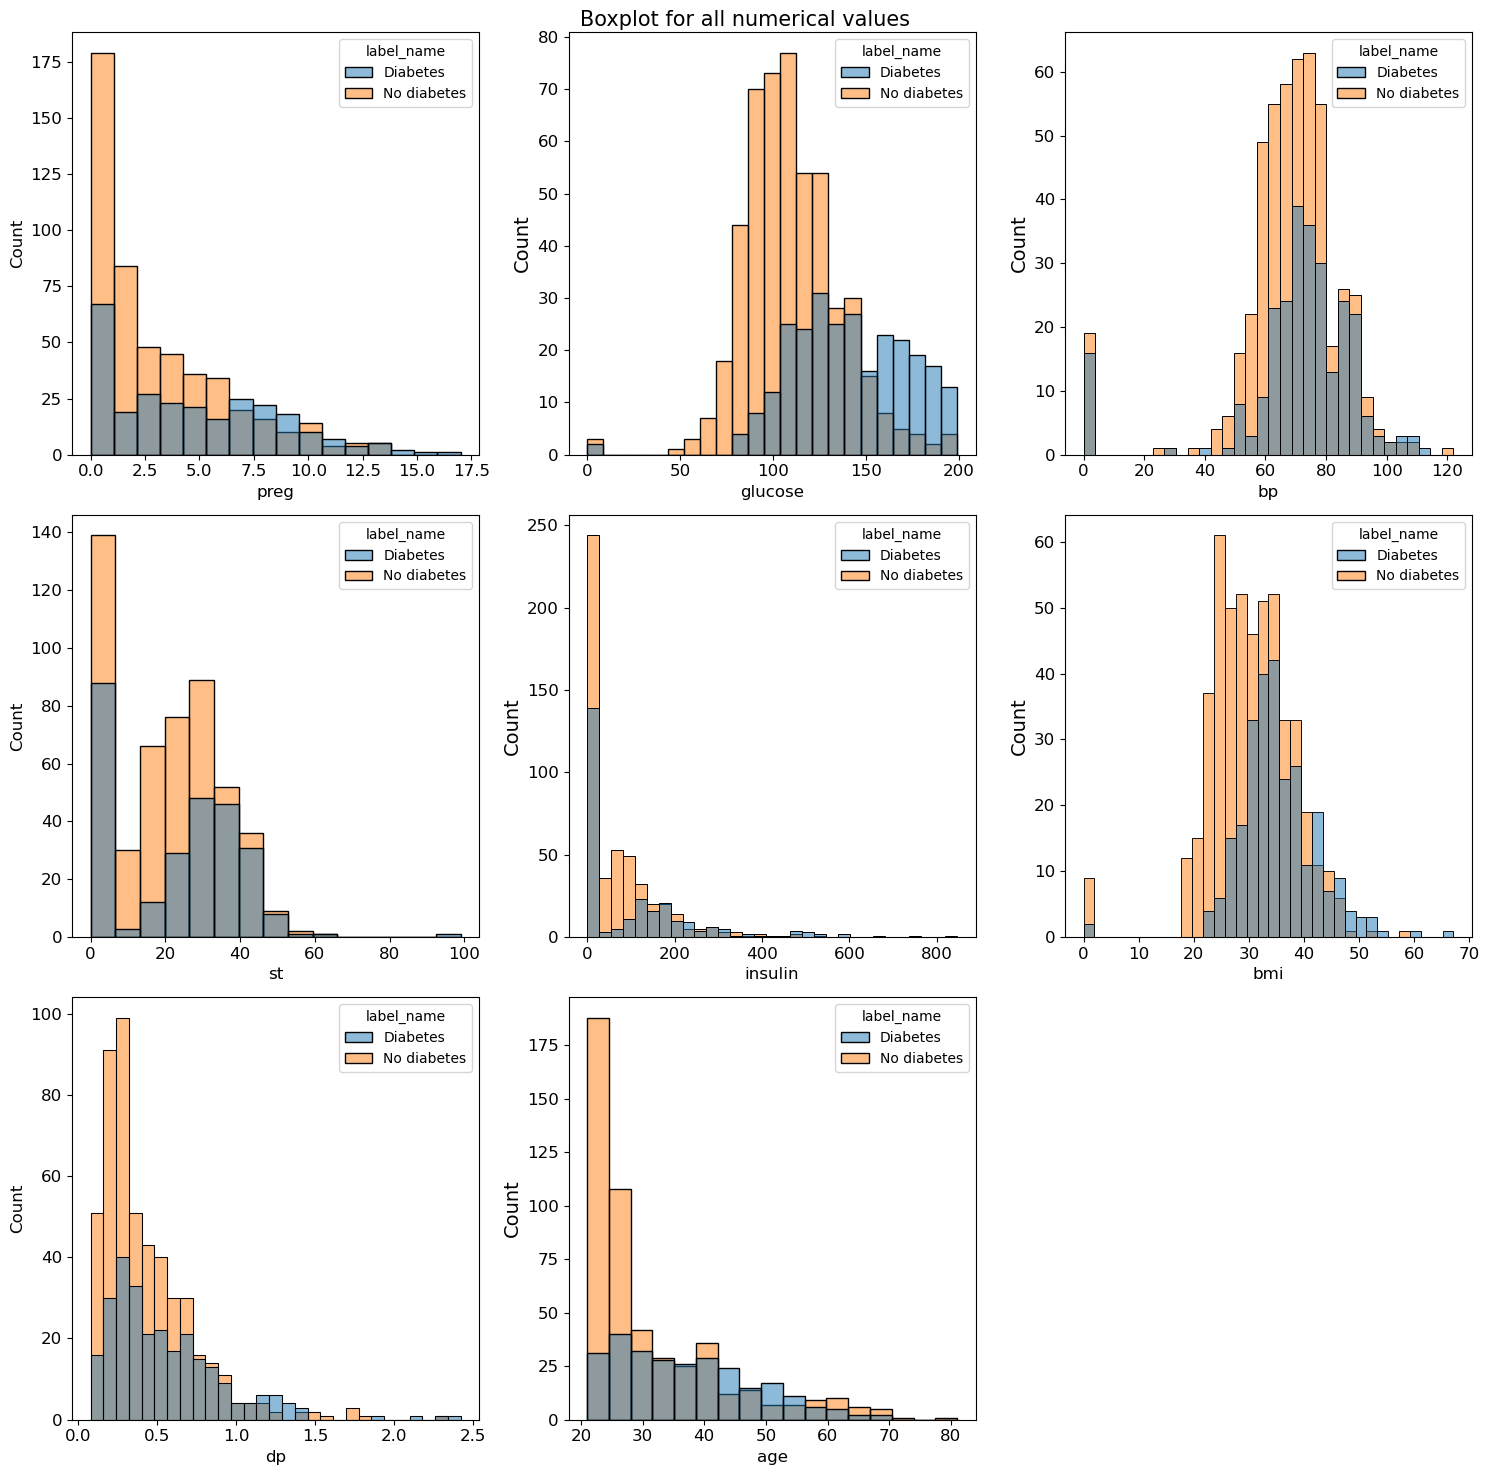

In [50]:
fig, axs= plt.subplots(3,3, figsize=(15, 15))
for_boxplot=df.columns[:-2]

for i in range(3):
    for j in range(3):
        index = i * 3 + j
        if index < len(for_boxplot):
            sns.histplot(df, x=for_boxplot[index], ax=axs[i,j], hue="label_name", palette=sns.color_palette("tab10",2))
            axs[i,j].set_xlabel(for_boxplot[index], fontsize=12)
            if j==0:
                axs[i,j].set_ylabel('Count', fontsize=12)
        else:
            fig.delaxes(axs[i, j])


fig.suptitle('Boxplot for all numerical values', fontsize=15)
plt.tight_layout()
plt.show()

### Pairplot

[]

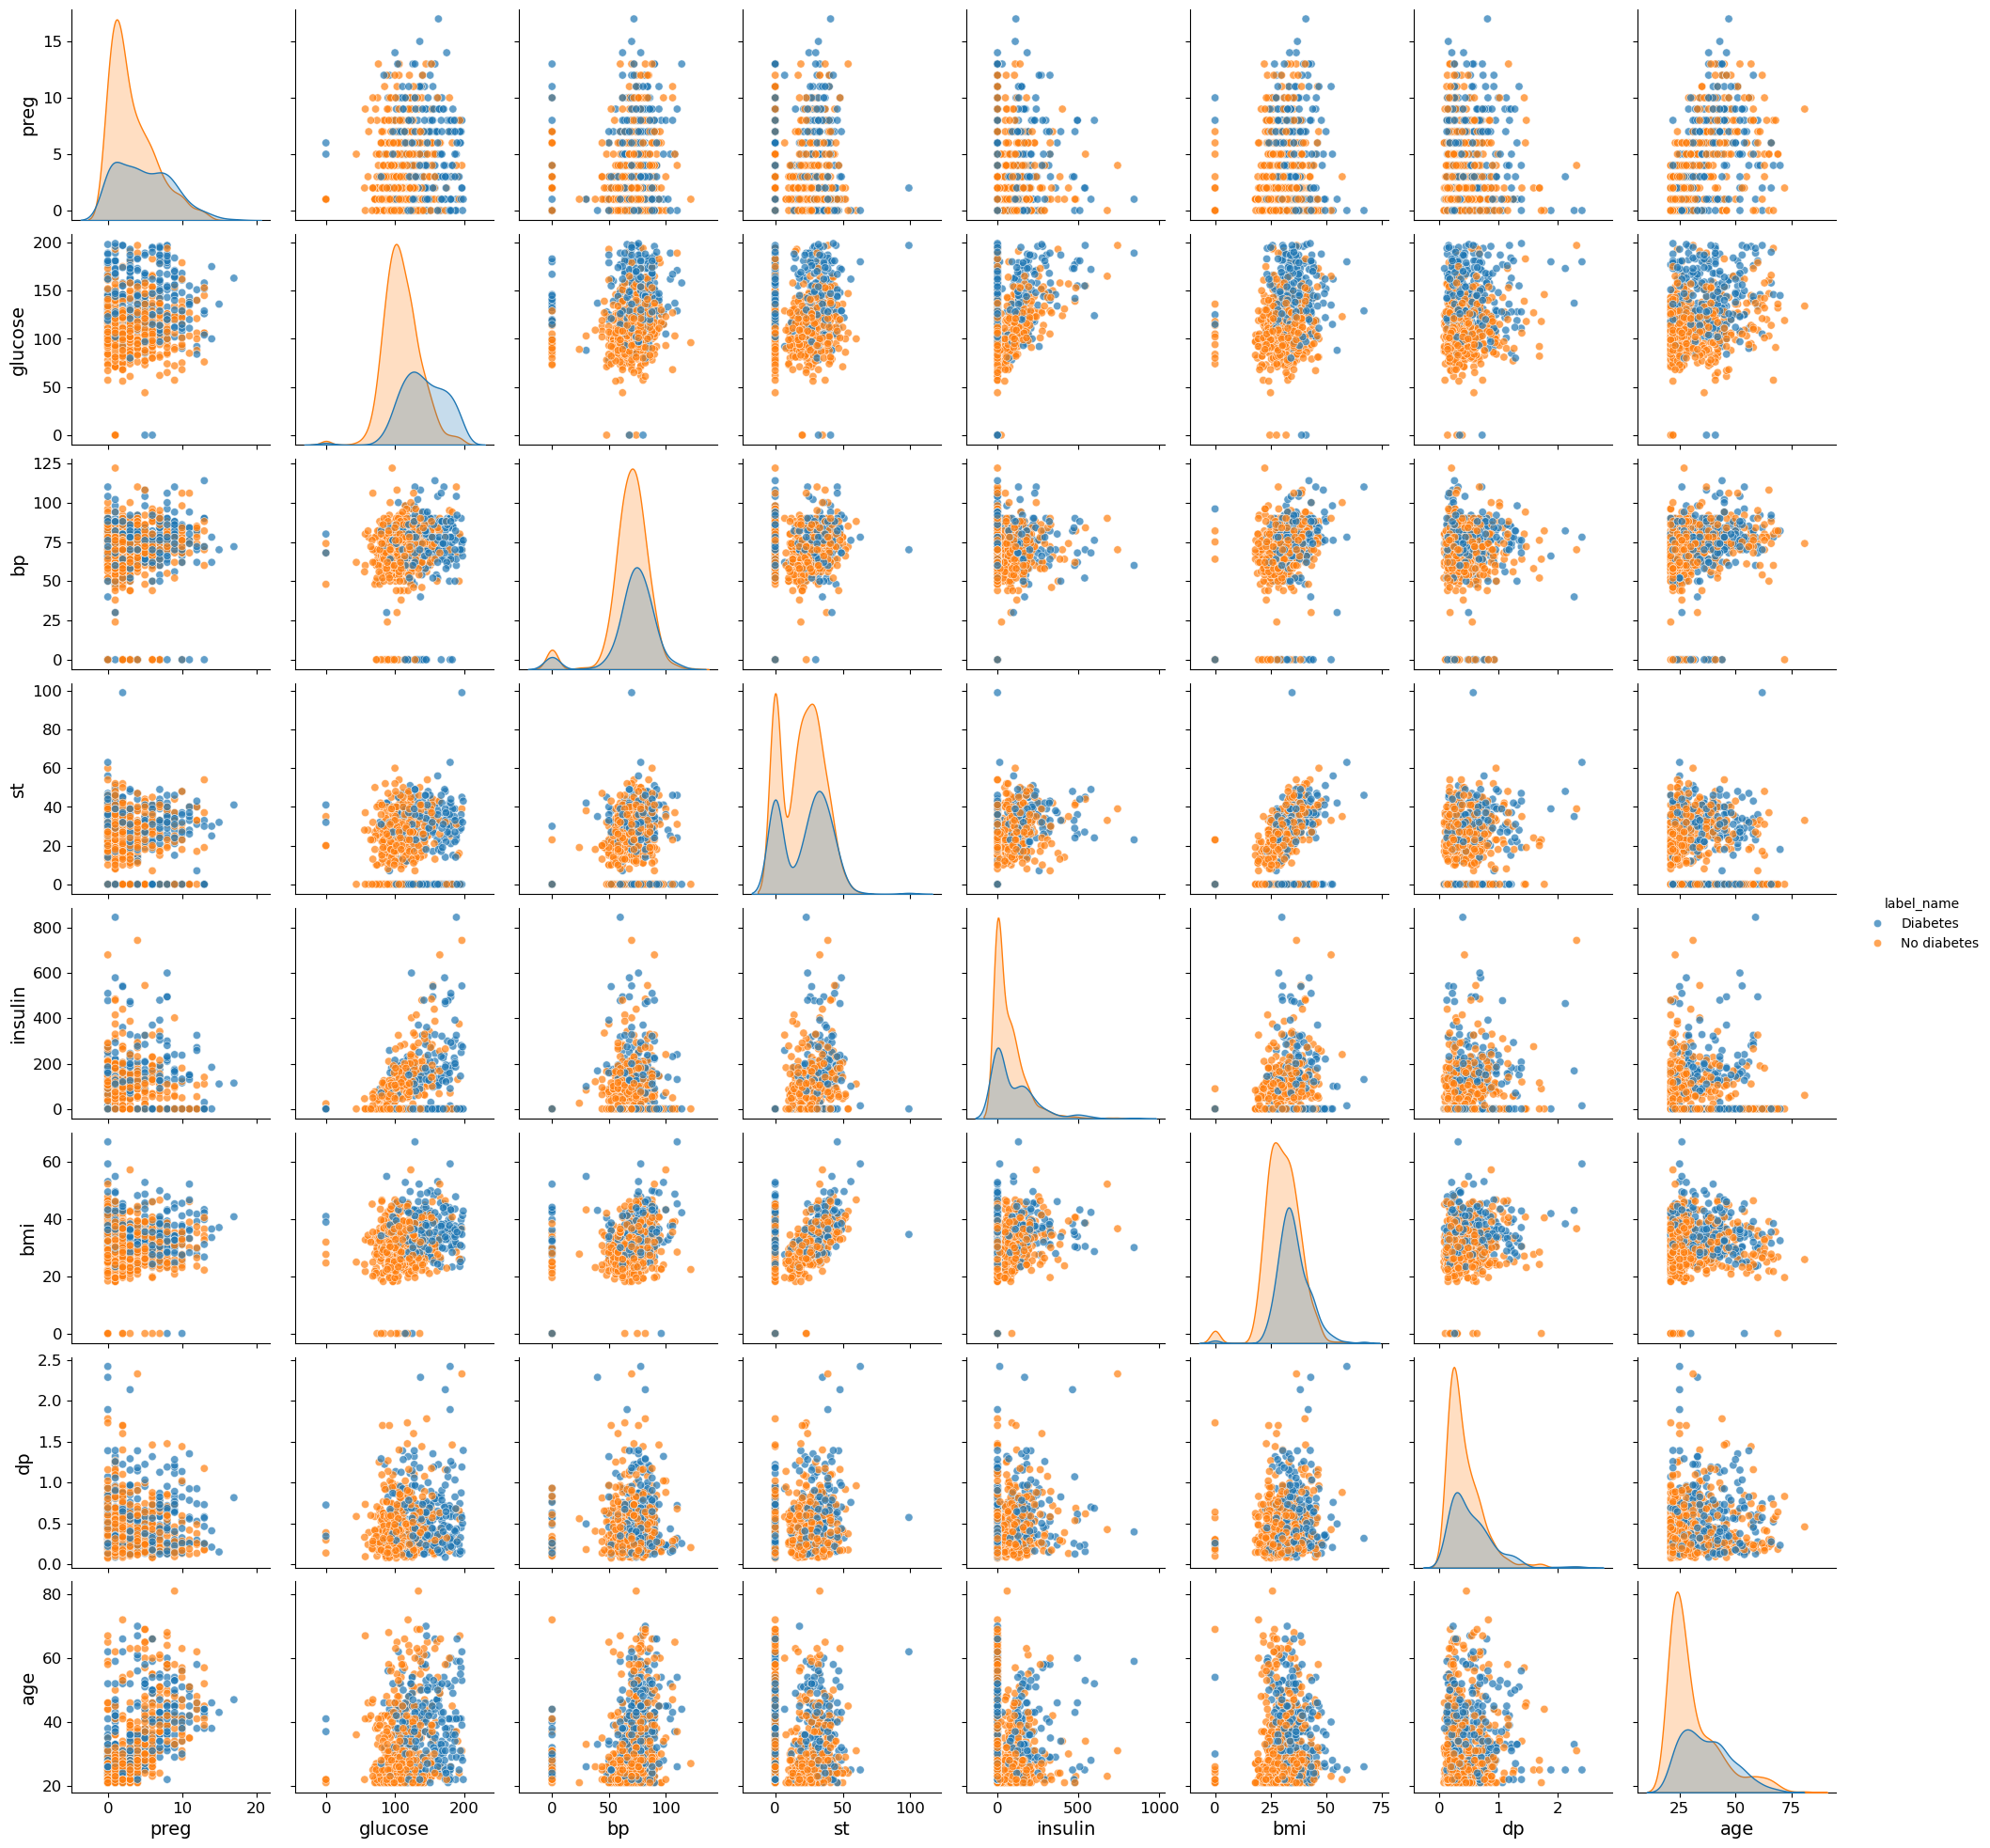

In [52]:
sns.pairplot(df.drop('label',axis=1), hue='label_name', diag_kind='kde', palette=sns.color_palette("tab10",2), plot_kws={'alpha': 0.7})
plt.plot()

glucose cannot be 0, remove 5
bp cannot be 0, remove 35
st cannot be 0 and 99, remove 228
insulin cannot be 0, remove 374
bmi connot be 0, remove 11

In [19]:
df.describe()

,preg,glucose,bp,st,insulin,bmi,dp,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.302083
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.953903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,-1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000,-1.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000,1.000000


In [72]:
df_alt=df[['preg','glucose','bp','bmi','dp','age']]
df_alt = df_alt.copy()
df_alt.loc[df_alt['glucose']==0, 'glucose']=np.NaN
df_alt.loc[df_alt['bp']==0, 'bp']=np.NaN
df_alt.loc[df_alt['bmi']==0, 'bmi']=np.NaN

## Base perceptron model

Perceptron Model F1 Score: 84.06%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67        52
         1.0       0.83      0.85      0.84       102

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



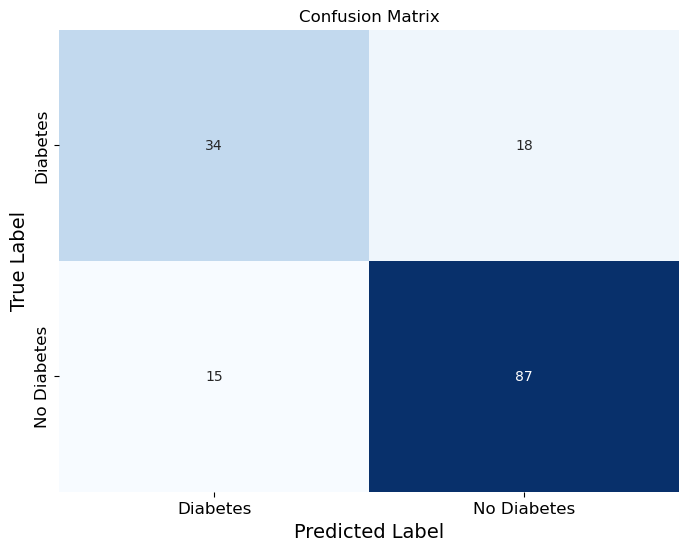


ROC-AUC Score: 0.85


In [334]:
X_train, X_test, y_train, y_test = train_test_split(df_alt.values, y, test_size=0.2, random_state=4)

imputer = SimpleImputer(strategy='median')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

perceptron = Perceptron()

perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

f1 = f1_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' depending on the dataset
print(f"Perceptron Model F1 Score: {f1* 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.yticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.show()

# Optional: Calculate ROC-AUC (for binary classification)
roc_auc = roc_auc_score(y_test, perceptron.decision_function(X_test))
print(f"\nROC-AUC Score: {roc_auc:.2f}")

## Base perceptron model with improvements

Perceptron Model F1 Score: 85.29%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.71      0.71      0.71        52
         1.0       0.85      0.85      0.85       102

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



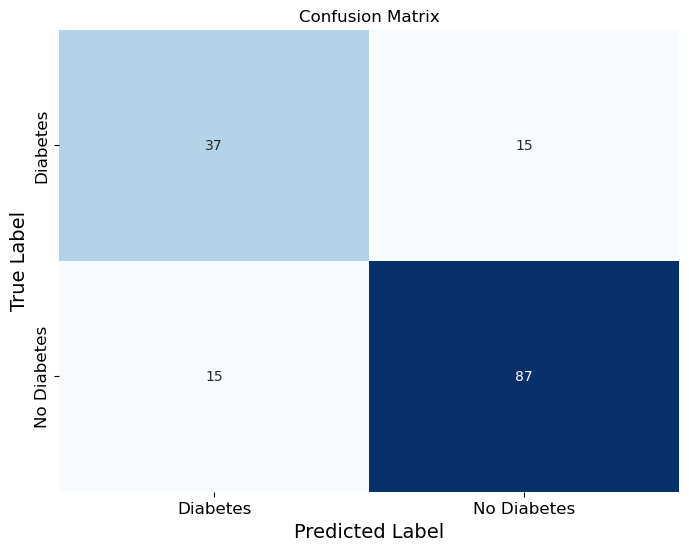


ROC-AUC Score: 0.87


In [332]:
X_train, X_test, y_train, y_test = train_test_split(df_alt.values, y, test_size=0.2, random_state=4)

imputer = SimpleImputer(strategy='median')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Define Perceptron and parameter grid for GridSearchCV
perceptron = Perceptron()

perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

f1 = f1_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' depending on the dataset
print(f"Perceptron Model F1 Score: {f1* 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.yticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.show()

# Optional: Calculate ROC-AUC (for binary classification)
roc_auc = roc_auc_score(y_test, perceptron.decision_function(X_test))
print(f"\nROC-AUC Score: {roc_auc:.2f}")

## Base perceptron model with improvements and hyperparameter tuning

Best parameters found:  Perceptron(eta0=0.1, max_iter=500)
Best cross-validation score:  0.6637645616581057
Perceptron Model F1 Score: 85.29%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.71      0.71      0.71        52
         1.0       0.85      0.85      0.85       102

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



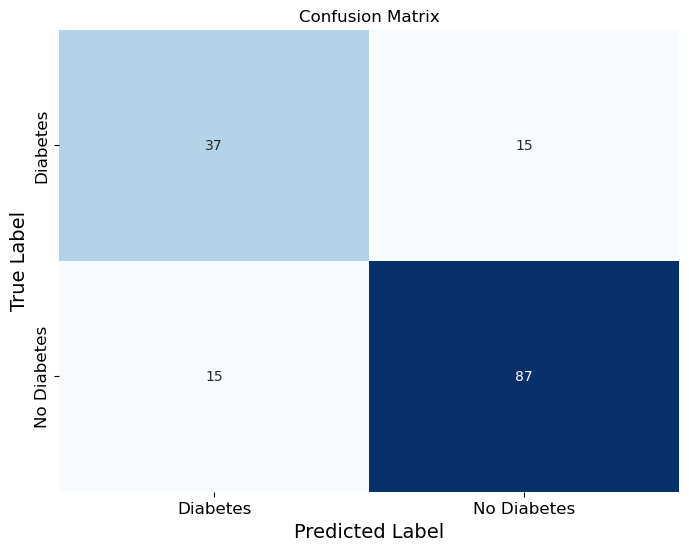


ROC-AUC Score: 0.87


In [345]:
X_train, X_test, y_train, y_test = train_test_split(df_alt.values, y, test_size=0.2, random_state=4)

imputer = SimpleImputer(strategy='median')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

perceptron = Perceptron()

param_grid = {
    'max_iter' : [500, 1000, 1500,2000, 3000],
#    'penalty': [None, 'l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1,1],
    'eta0': [0.0001 ,0.001 ,0.01, 0.1]
}

grid_search = GridSearchCV(perceptron, param_grid, cv=10, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_perceptron = grid_search.best_estimator_

y_pred = best_perceptron.predict(X_test)

print("Best parameters found: ", best_perceptron)
print("Best cross-validation score: ", grid_search.best_score_)

f1 = f1_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' depending on the dataset
print(f"Perceptron Model F1 Score: {f1* 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.yticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.show()

# Optional: Calculate ROC-AUC (for binary classification)
roc_auc = roc_auc_score(y_test, best_perceptron.decision_function(X_test))
print(f"\nROC-AUC Score: {roc_auc:.2f}")

## Multi layer perceptron

MLP Model F1 Score: 87.32%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.79      0.65      0.72        52
         1.0       0.84      0.91      0.87       102

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



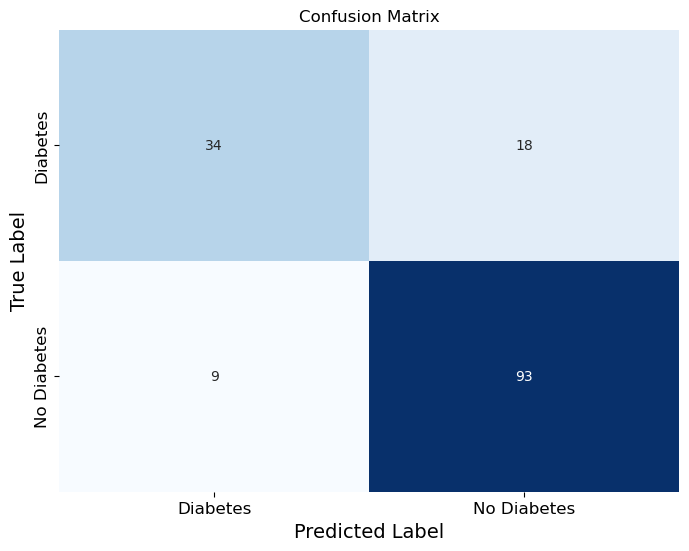


ROC-AUC Score: 0.86


In [354]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_alt.values, y, test_size=0.2, random_state=4)

# Impute missing values using median strategy
imputer = SimpleImputer(strategy='median')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Define MLPClassifier (Multi-Layer Perceptron) with a hidden layer size of 100 neurons (you can adjust)
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# Predict using the MLPClassifier
y_pred = mlp.predict(X_test)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # For binary classification
print(f"MLP Model F1 Score: {f1 * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.yticks(ticks=[0.5,1.5],labels=['Diabetes', 'No Diabetes'])
plt.show()

roc_auc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.2f}")

## Custom perceptron using PyTorch

In [377]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Prepare your data as before (imputation, scaling, polynomial features)
X_train, X_test, y_train, y_test = train_test_split(df_alt.values, [0 if i==-1 else 1 for i in y], test_size=0.2, random_state=4)

# Imputation
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a simple Perceptron model using PyTorch
class PerceptronModel(nn.Module):
    def __init__(self, input_size):
        super(PerceptronModel, self).__init__()
        # Single linear layer (no hidden layers)
        self.fc1 = nn.Linear(input_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        return torch.sigmoid(out) 


model = PerceptronModel(X_train.shape[1])

# loss function and optimizer
criterion = nn.BCELoss()  
optimizer = optim.Adamax(model.parameters(), lr=0.001)

num_epochs = 1500
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).round()
    y_pred_test = model(X_test_tensor).round()

    # Convert predictions and true labels to numpy arrays for metric calculations
    y_pred_test = y_pred_test.numpy()
    y_test = y_test_tensor.numpy()

    # F1 Score
    f1 = f1_score(y_test, y_pred_test)
    print(f'F1 Score: {f1:.4f}')

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix:\n", conf_matrix)


Epoch [100/1500], Loss: 0.6613
Epoch [200/1500], Loss: 0.6373
Epoch [300/1500], Loss: 0.6166
Epoch [400/1500], Loss: 0.5982
Epoch [500/1500], Loss: 0.5818
Epoch [600/1500], Loss: 0.5672
Epoch [700/1500], Loss: 0.5542
Epoch [800/1500], Loss: 0.5426
Epoch [900/1500], Loss: 0.5324
Epoch [1000/1500], Loss: 0.5233
Epoch [1100/1500], Loss: 0.5154
Epoch [1200/1500], Loss: 0.5085
Epoch [1300/1500], Loss: 0.5025
Epoch [1400/1500], Loss: 0.4974
Epoch [1500/1500], Loss: 0.4930
F1 Score: 0.8756
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.62      0.70        52
         1.0       0.83      0.93      0.88       102

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[32 20]
 [ 7 95]]
